# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [21]:
import math
import sys

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

# YOU MAY IMPORT MORE SKLEARN MODULES BASED ON YOUR CHOICES BELOW.

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [23]:
# YOUR CODE HERE

Body_Fat_data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"
Body_Fat_DF = pd.read_csv(Body_Fat_data, sep='\t')
body_Fat_DF_Ten = Body_Fat_DF.drop(columns=['target', 'Wrist', 'Forearm', 'Biceps', 'Ankle'])
random_sample_rows = body_Fat_DF_Ten.sample(n=10, random_state=42)
print(random_sample_rows)

     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
165   1.0549  35.0  217.00   73.75  40.500000  107.500000   95.099998   
6     1.0549  26.0  181.00   69.75  36.400002  105.099998   90.699997   
111   1.0355  43.0  183.25   70.00  37.099998  108.000000  105.000000   
172   1.0521  35.0  177.25   71.00  38.400002  100.500000   90.300003   
115   1.0607  40.0  158.00   69.25  36.299999   97.000000   86.599998   
183   1.0713  40.0  159.25   69.75  35.299999   92.300003   86.800003   
199   1.0462  43.0  170.75   67.50  37.400002  103.699997   89.699997   
235   1.0563  62.0  168.75   67.50  38.299999  104.699997   95.599998   
9     1.0722  23.0  198.25   73.50  42.099998   99.599998   88.599998   
30    1.0716  32.0  182.00   73.75  38.700001  100.500000   88.699997   

            Hip      Thigh       Knee  
165  104.500000  64.800003  41.299999  
6    100.300003  58.400002  38.299999  
111  103.000000  63.700001  40.000000  
172   98.699997  57.799999  37.29999

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [24]:
# YOUR CODE HERE
column_names = list(Body_Fat_DF.columns)
print(column_names)

['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']


YOUR ANSWERS HERE

In [25]:
print('Density = Is mainly used to help estimate the body fat percentage by using the bodies total mass/volume to give the density.')
print('Age = How old in years the person is.')
print('Weight = An individuals weight expressed in pounds(lbs).')
print('Height = How tall someone is expressed in inches.')
print('Neck = Measurement taken based on the circumference of the neck is expressed in centimeters(cm).')
print('Chest = Measurement taken based on the circumference of the chest expressed in centimeters(cm).')
print('Abdomen = otherwise known as the stomach holds most of the body fat in most individuals. It is measured in circumference in centimeters(cm)')
print('Hip = Measured in centimeters (cm).')
print('Thigh = upper thigh measured in centimeters(cm).')
print('Knee = which connects the thigh to the leg and most common injury in sports is measured in centimeters(cm).')
print('Ankle = From where the leg and feet meet, is measured in centimeters (cm).')
print('Biceps = Known for having three different parts, the long head, short head and brachialis. Measured in centimeters(cm)')
print('Forearm = in between the ankle and elbow is responsible for allowing individuals to pick up and grasp/hold certain objects. Measured in centimeters(cm)')
print('Wrist = capacble of handling various types of range of motion movements. Measured in centimeters(cm)')
print('Target = the amount of body fat in percentage.')

Density = Is mainly used to help estimate the body fat percentage by using the bodies total mass/volume to give the density.
Age = How old in years the person is.
Weight = An individuals weight expressed in pounds(lbs).
Height = How tall someone is expressed in inches.
Neck = Measurement taken based on the circumference of the neck is expressed in centimeters(cm).
Chest = Measurement taken based on the circumference of the chest expressed in centimeters(cm).
Abdomen = otherwise known as the stomach holds most of the body fat in most individuals. It is measured in circumference in centimeters(cm)
Hip = Measured in centimeters (cm).
Thigh = upper thigh measured in centimeters(cm).
Knee = which connects the thigh to the leg and most common injury in sports is measured in centimeters(cm).
Ankle = From where the leg and feet meet, is measured in centimeters (cm).
Biceps = Known for having three different parts, the long head, short head and brachialis. Measured in centimeters(cm)
Forearm = 

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

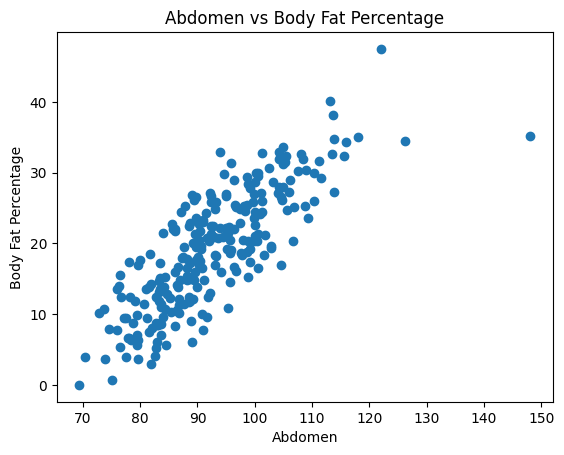

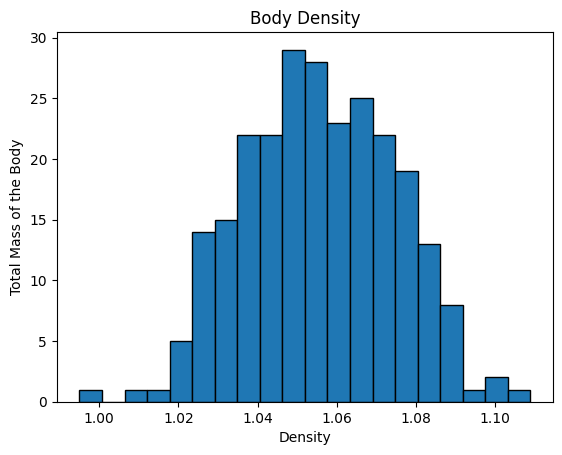

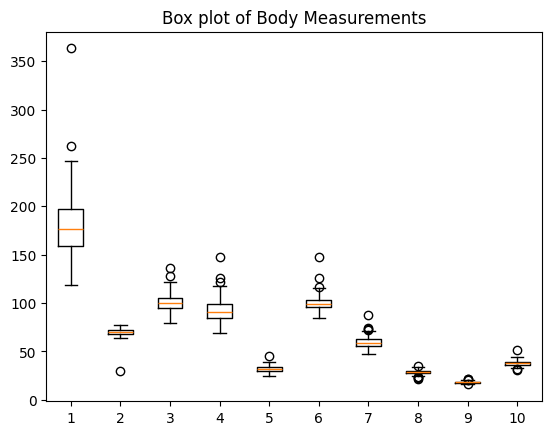

In [26]:
# YOUR CODE HERE
Body_Fat_DF = Body_Fat_DF.dropna()

plt.Figure()
plt.scatter(Body_Fat_DF['Abdomen'], Body_Fat_DF['target'])
plt.xlabel('Abdomen')
plt.ylabel('Body Fat Percentage')
plt.title('Abdomen vs Body Fat Percentage')
plt.show ()

plt.figure()
plt.hist(Body_Fat_DF['Density'], bins=20, edgecolor='black')
plt.xlabel('Density')
plt.ylabel('Total Mass of the Body')
plt.title('Body Density')
plt.show()

cols = ['Weight', 'Height', 'Chest', 'Abdomen', 'Biceps', 'Hip', 'Thigh', 'Forearm', 'Wrist', 'Neck']
plt.figure()
plt.boxplot([Body_Fat_DF[col] for col in cols], label=cols)
plt.title('Box plot of Body Measurements')
plt.show()

YOUR ANSWERS HERE

In [27]:
print('It seems that abdomen and body fat pecentage(target) has a strong correlation with each other. It does make sense that the data of these two have a strong relationship since the abdomen does dold most of the body fat in individuals.')

It seems that abdomen and body fat pecentage(target) has a strong correlation with each other. It does make sense that the data of these two have a strong relationship since the abdomen does dold most of the body fat in individuals.


### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

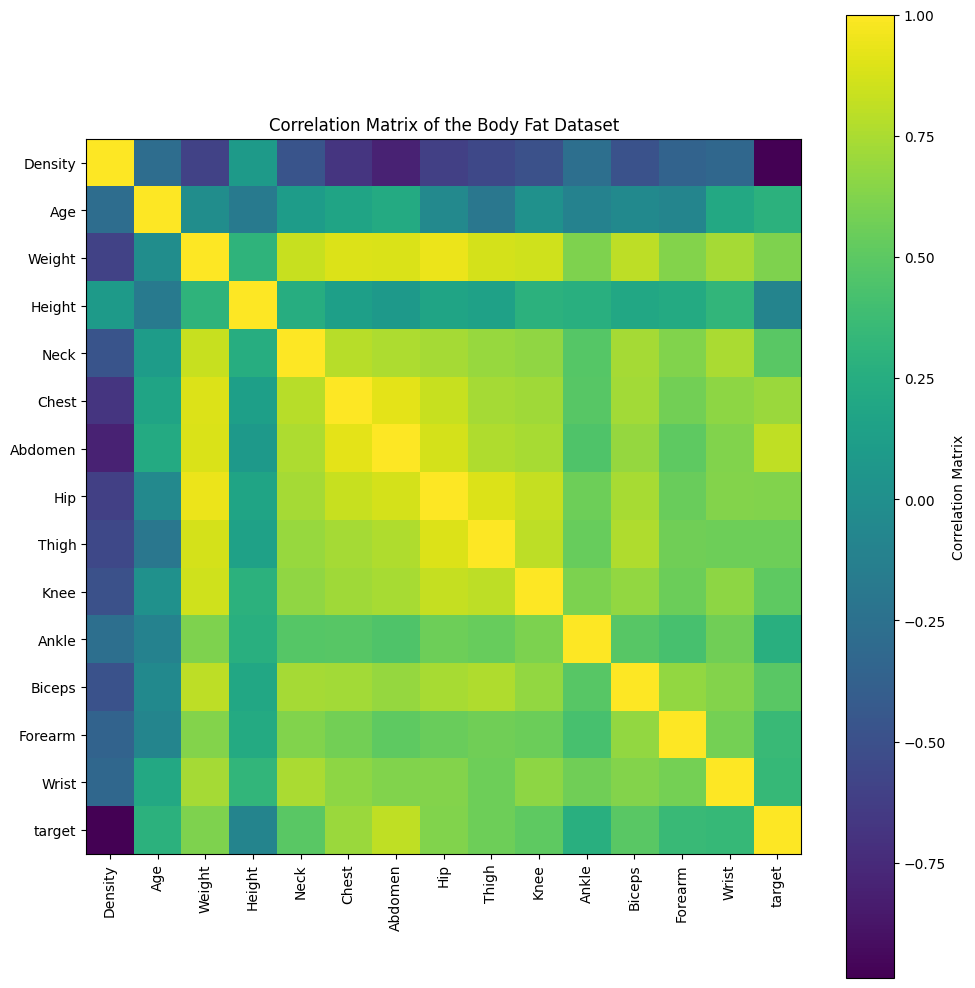

Most correlated pair: ('Density', 'target')


In [28]:
# YOUR CODE HERE
correlation_matrix = Body_Fat_DF.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation Matrix')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.title('Correlation Matrix of the Body Fat Dataset')
plt.tight_layout()
plt.show()

corr_ver = correlation_matrix.values.copy()
np.fill_diagonal(corr_ver, 0)
max_corr_idx = np.unravel_index(np.argmax(np.abs(corr_ver)), corr_ver.shape)
most_corr_pair = (correlation_matrix.columns[max_corr_idx[0]], correlation_matrix.columns[max_corr_idx[1]])
print("Most correlated pair:", most_corr_pair)


YOUR ANSWERS HERE

In [29]:
print('From the heat map, it seems that Density and Target are the most correlated. This is inline with the dataset, since density is is the total mass/volume, and the target is the amount of body fat in percentage.')

From the heat map, it seems that Density and Target are the most correlated. This is inline with the dataset, since density is is the total mass/volume, and the target is the amount of body fat in percentage.


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

Note: if you chose a classification dataset (e.g. Titanic), treat this as a 0-1 regression problem where 1 corresponds to membership in the target class and 0 corresponds to not being in the class.
Do the same for all the following regression problems.

In [30]:
# YOUR CODE HERE
print("https://scikit-learn.org/stable/modules/tree.html", "https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/")
print("https://scikit-learn.org/stable/modules/ensemble.html#", "https://medium.com/@byanalytixlabs/random-forest-regression-how-it-helps-in-predictive-analytics-01c31897c1d4")
print("https://scikit-learn.org/stable/modules/linear_model.html", "https://en.wikipedia.org/wiki/Linear_regression")

https://scikit-learn.org/stable/modules/tree.html https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
https://scikit-learn.org/stable/modules/ensemble.html# https://medium.com/@byanalytixlabs/random-forest-regression-how-it-helps-in-predictive-analytics-01c31897c1d4
https://scikit-learn.org/stable/modules/linear_model.html https://en.wikipedia.org/wiki/Linear_regression


YOUR ANSWERS HERE

In [31]:
print('The three different regression models I chose were Linear Regression, Decision Tree Regression, and Random Forest Regression.')

The three different regression models I chose were Linear Regression, Decision Tree Regression, and Random Forest Regression.


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

LinearRegression - L2 (MSE): 0.397, L1 (MAE): 0.484
DecisionTree - L2 (MSE): 0.564, L1 (MAE): 0.370
RandomForest - L2 (MSE): 0.195, L1 (MAE): 0.268


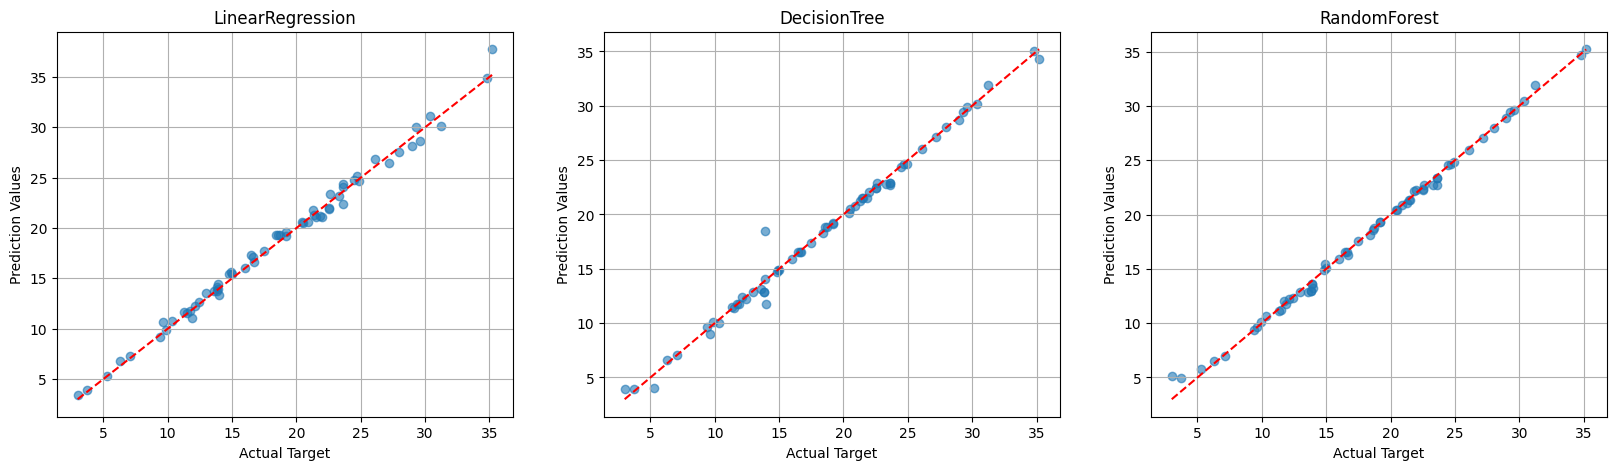

In [32]:
# YOUR CODE HERE

Body_Fat_DF = Body_Fat_DF.dropna()
X = Body_Fat_DF.drop(columns=['target'])
y = Body_Fat_DF['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
}

plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Actual Target")
    plt.ylabel("Prediction Values")
    plt.grid(True)
    l2 = mean_squared_error(y_test, y_pred)
    l1 = mean_absolute_error(y_test, y_pred)
    print(f"{name} - L2 (MSE): {l2:.3f}, L1 (MAE): {l1:.3f}")
plt.show()


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [33]:
# YOUR CODE HERE
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

l2_scorer = make_scorer(mean_squared_error, greater_is_better=False)
for name, model in models.items():
    mse_scores = cross_val_score(model, X, y, cv=5, scoring=l2_scorer)
    mean_l2 = -np.mean(mse_scores)
    print(f"{name} - Cross Validated L2 Loss: {mean_l2:.3f}")

LinearRegression - Cross Validated L2 Loss: 1.963
DecisionTree - Cross Validated L2 Loss: 3.673
RandomForest - Cross Validated L2 Loss: 2.528


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [34]:
# YOUR CODE HERE
pipelines = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'DecisionTree': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
    ])
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    l2 = mean_squared_error(y_test, y_pred)
    print(f"{name} - L2 Loss: {l2:.3f}")


LinearRegression - L2 Loss: 0.397
DecisionTree - L2 Loss: 0.567
RandomForest - L2 Loss: 0.206


YOUR ANSWERS HERE

In [35]:
print('It seems that the L2 loss is the same for Linear Reegression, but it is slightly different in Decision Tree and Random Forest. The results for L2 loss for Decision Tree are 0.003 higher than in problem 6, and L2 loss for Random Forest is 0.011 greater than problem 6.')

It seems that the L2 loss is the same for Linear Reegression, but it is slightly different in Decision Tree and Random Forest. The results for L2 loss for Decision Tree are 0.003 higher than in problem 6, and L2 loss for Random Forest is 0.011 greater than problem 6.


### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [36]:
# YOUR CODE HERE

YOUR ANSWERS HERE

In [37]:
print("This method could work with slight improvements but decision trees are more likely to create bias and overfitting, which is why it would be best to include an ensemble due to less risk of over fitting, and the increased efficiency ensembles produced such as a Random Forest Regression.")

This method could work with slight improvements but decision trees are more likely to create bias and overfitting, which is why it would be best to include an ensemble due to less risk of over fitting, and the increased efficiency ensembles produced such as a Random Forest Regression.


### Problem 10 (5 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [38]:
# YOUR CODE HERE

YOUR ANSWERS HERE

In [39]:
print('I would say Random Forest Regression is the best model that I built. I was stuck on which models would be the best to use, so with the help of classmates and claude.ai, I was able to come to a conclusion that Random Forest Regression would be the best model. The reason I picked this model was the reduced variance, reduced amount of overfitting, and the capability of handling non-linear relations. Random Forest Regression performed the best amongst all other models which is why I picked it. It consistently had the lowest L2 loss in problems 6 and 8. ')

I would say Random Forest Regression is the best model that I built. I was stuck on which models would be the best to use, so with the help of classmates and claude.ai, I was able to come to a conclusion that Random Forest Regression would be the best model. The reason I picked this model was the reduced variance, reduced amount of overfitting, and the capability of handling non-linear relations. Random Forest Regression performed the best amongst all other models which is why I picked it. It consistently had the lowest L2 loss in problems 6 and 8. 


### Problem 11 (5 points)

Please give session links for any AI tools that you used for this final project.
If you did not use any such tools, please say "None".

You will get full credit for this problem as long as you add links in the cell below or update the text to say None.
There will be no penalties for this tool usage; we simply to understand how you are handling these problems now.

Answers to this problem will not be accepted outside the normal submission process.
Emails after the deadline saying that you forgot will not get you credit.

YOUR ANSWERS HERE

In [40]:
print("https://claude.ai/share/83265e81-69b7-49f3-816c-b21f0815ef61")

https://claude.ai/share/83265e81-69b7-49f3-816c-b21f0815ef61
